In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
n_trials = 100_000

## Exercises

#### For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
#### What is the probability that no cars drive up in the noon hour?

Text(0.5, 0, 'Cars Waiting')

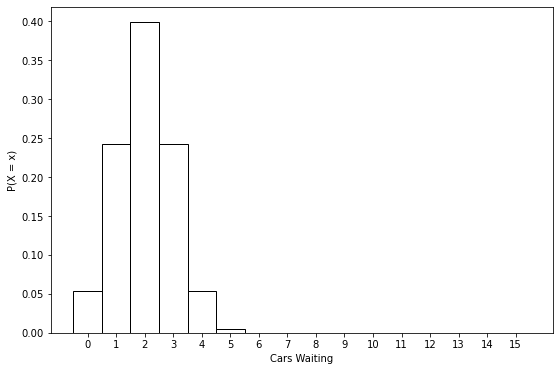

In [3]:
x = range(16)
y = stats.norm(2).pdf(x)
plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.xticks(x)
plt.ylabel('P(X = x)')
plt.xlabel('Cars Waiting')

We have average but we want probability of less cars showing up.

We will use .cdf

In [4]:
stats.poisson(2).cdf(0)

0.1353352832366127

#### What is the probability that 3 or more cars come through the drive through?

In [5]:
stats.poisson(2).sf(2)

0.32332358381693654

#### How likely is it that the drive through gets at least 1 car?

In [6]:
stats.poisson(2).sf(0)

0.8646647167633873

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

#### What grade point average is required to be in the top 5% of the graduating class?

In [7]:
μ = 3
σ = 0.3
grades = stats.norm(μ, σ)

In [8]:
top_5_percent_cutoff = grades.ppf(.95)
top_5_percent_cutoff

3.4934560880854417

#### What GPA constitutes the bottom 15% of the class?

In [9]:
bottom_15_percent_cutoff = grades.ppf(.15)
bottom_15_percent_cutoff

2.689069983151863

#### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?


In [10]:
bottom_30_percent_cutoff = grades.ppf(.30)
bottom_20_percent_cutoff = grades.ppf(.20)

In [11]:
(bottom_20_percent_cutoff, bottom_30_percent_cutoff,)

(2.7475136299281258, 2.842679846187588)

The student with a 2.8 GPA would be eligibile for the scholarship.

#### If I have a GPA of 3.5, what percentile am I in?

In [12]:
grades.cdf(3.5)

0.9522096477271853

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [13]:
click_rate = .02
visitors = 4326
clicks = 97
expected = click_rate * visitors
stats.poisson(expected).sf(96)

0.14211867659283192

In [14]:
#simulation


### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

#### What is the probability that at least one of your first 60 answers is correct?

In [15]:
correct_question = stats.binom(60, 1/101).ppf(1)
correct_question

60.0

In [16]:
#simulation
outcomes = ["Correct", "Incorrect"]
answers = np.random.choice(outcomes, size=(n_trials, 60), p=[1/101, 100/101])
np.count_nonzero(answers == 'Correct', axis=1).mean()

0.59235

In [17]:
answers.shape

(100000, 60)

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area.

#### How likely is it that the break area gets cleaned up each day? 

In [50]:
μ = .03
students = 22 * 3
breakroom_users = .9 * students
breakroom_users = round(break_area_users)
breakroom_users

59

In [51]:
cleaned_breakroom = stats.binom(break_area_users, μ).sf(0)
cleaned_breakroom

0.8342199288437355

In [55]:
#simulation
outcomes = ["clean", "messy"]
breakroom_status = np.random.choice(outcomes, size=(n_trials, breakroom_users), p=[μ, 1-μ])
breakroom_status

array([['clean', 'messy', 'messy', ..., 'messy', 'messy', 'messy'],
       ['clean', 'messy', 'messy', ..., 'messy', 'messy', 'messy'],
       ['messy', 'messy', 'messy', ..., 'messy', 'messy', 'messy'],
       ...,
       ['messy', 'messy', 'messy', ..., 'messy', 'messy', 'messy'],
       ['messy', 'messy', 'messy', ..., 'messy', 'messy', 'messy'],
       ['messy', 'messy', 'messy', ..., 'messy', 'messy', 'messy']],
      dtype='<U5')

In [56]:
breakroom_status.shape

(100000, 59)

In [65]:
(np.count_nonzero(breakroom_status == 'clean', axis=1) >= 1).mean()

0.83604

#### How likely is it that it goes two days without getting cleaned up?

In [66]:
cleaned_day = (np.count_nonzero(breakroom_status == 'clean', axis=1) >= 1).mean()

In [68]:
days_passed = stats.binom(2, 1-cleaned_day).
days_passed

1.0

In [61]:
#Simulation
two_day_status = np.random.choice(outcomes, size=(n_trials, 2), p=[cleaned_breakroom, 1-cleaned_breakroom])
two_day_status

array([['clean', 'clean'],
       ['clean', 'clean'],
       ['clean', 'clean'],
       ...,
       ['messy', 'clean'],
       ['clean', 'clean'],
       ['clean', 'clean']], dtype='<U5')

In [63]:
(np.count_nonzero(two_day_status == 'messy', axis=1) == 2).mean()

0.02769

#### All week?

In [75]:
week_status = np.random.choice(outcomes, size=(n_trials, 5), p=[cleaned_breakroom, 1-cleaned_breakroom])
week_status

array([['clean', 'clean', 'messy', 'messy', 'clean'],
       ['clean', 'messy', 'clean', 'clean', 'clean'],
       ['clean', 'messy', 'clean', 'clean', 'clean'],
       ...,
       ['clean', 'clean', 'messy', 'clean', 'messy'],
       ['clean', 'clean', 'clean', 'clean', 'messy'],
       ['clean', 'clean', 'messy', 'clean', 'clean']], dtype='<U5')

In [76]:
(np.count_nonzero(week_status == 'messy', axis=1) == 7).mean()

0.0

In [77]:
week_status.shape

(100000, 5)

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.



In [98]:
μ = 15
#people in line
σ = 3

t_to_order = 2
t_to_get = 10

It takes 12 minutes to order and receive food and we want to have 15 minutes to eat.

With 60 minutes alloted for lunch, we only have 33 minutes to wait in line.

In [90]:
people_in_line = stats.norm(μ, σ)

In [99]:
people_in_line.cdf(2)

7.343423836894689e-06

ValueError: shape mismatch: objects cannot be broadcast to a single shape

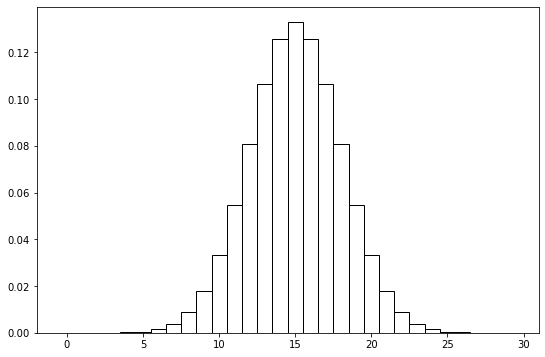

In [107]:
#graph
x = range(30)
y = people_in_line.pdf(x)
plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
z = range(0,2)
plt.bar(z, y, edgecolor='black', color='cyan', width=1)
plt.xticks(x)
plt.ylabel('P(X = x)')
plt.xlabel('People Waiting')